In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Instalacion de Java
Google Colaboratory funciona en un ambiente linux, por lo tanto se pueden usar comandos shell de linux antecedidos del caracter '!'

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:

!pip install findspark

## Instalacion de Spark

Obtener automaticamente la ultima version de spark de

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
#Obtener las versiones de spark la pagina web
url = 'https://downloads.apache.org/spark/'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)

In [ ]:
# leer la pagina web y obtener las versiones de spark disponibles
link_files = []
for link in soup.find_all('a'):
  link_files.append(link.get('href'))
spark_link = [x for x in link_files if 'spark' in x]
print(spark_link)

In [ ]:
#ver_spark = spark_link[1][:-1] # obtener la version y eliminar el caracter '/' del final
#print(ver_spark)

In [ ]:
import os # libreria de manejo del sistema operativo
#instalar automaticamente la version deseadda de spark
import os # libreria de manejo del sistema operativo
#instalar automaticamente la version deseadda de spark
!wget -q https://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
# instalar pyspark
#!pip install -q pyspark

In [ ]:
!pwd

In [ ]:
!pip install -q pyspark==3.5.1

## Definir variables de entorno

In [ ]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/spark-3.5.1-bin-hadoop3"

# Introducción

La presente guía tiene como objetivo introducir al alumno a la tecnología Spark, a través de Pyspark estructurado. NO pretende ser una guía exhaustiva a esta tecnología, sino un punto de partida mediante el uso de Spark Dataframes.

# Qué es spark

Spark es un motor de procesamiento distribuido implementado en Scala que se ejecuta fundamentalmente en memoria.

Se construye sobre Hadoop, pero es, por tanto, más rápido que Hadoop:

1. Está orientado al **procesamiento en memoria**, reduciendo las operaciones de escritura y lectura.
2. **Lazy Evaluation**: las operaciones de transformación sólo se ejecutan cuando se realicen las acciones (mostrar, agregar, etc)
3. Permite trabajar en **tiempo real**, con procesamiento en batch y de forma interactiva.
4. Disponible en múltiples **lenguajes de programación**: Java, R, Python, Scala…


## Principales componentes

* Core: el núcleo de procesamiento de spark sobre el que se ejecutan las siguientes librerías.

* Spark SQL: permite trabajar sobre los datos con una interfaz SQL en programas basados en SPARK

* Streaming: permite el procesamiento en tiempo real de datos

* Mllib: permite aprendizaje automático

* Graphx: Visualización y motor de grafos sobre Spark

Cada una de estas librerías están encapsuladas, de forma que puedo estar generando código de sparkmlib que será traducido a un DAG que será ejecutado por el core de Spark. Asimismo, Spark se puede utilizar con varios lenguajes (en Python, usaremos Pyspark). Este código será traducido a bytecode que será ejecutado por las diferentes JVM de los nodos.

## Arquitectura
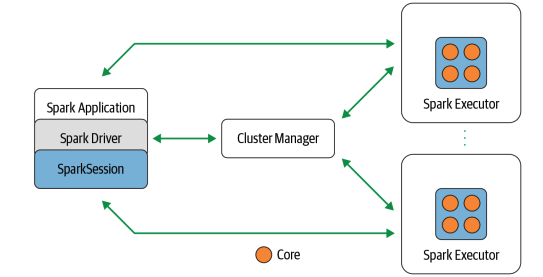

Spark driver es el componente encargado de instanciar el contexto o la sesión (Spark session). Es el componente encargado de interaccionar con el Cluster Manager (por ejemplo, YARN) para gestionar recursos. Asimismo, es el encargado de realizar el DAG y planificar y gestionar la ejecución de las tareas.

La sesión (Spark Session) es la puerta de entrada, unificando lo que antes de Spark 2.0 eran los diferentes Contextos. Permite definir DF, Datasets, lectura y escritura de datos, acceso al Spark Context, metadatos, etc.

Los nodos, Workers, interaccionan con el Manager para realizar y controlar la ejecución de las tareas.

El Cluster Manager es el responsable de crear los Executors en las máquinas del cluster y, por tanto, de gestionar esos recursos.  Estos executors son ’agentes’ encargados de realizar las operaciones de la app.


El Driver, la aplicación Spark,  crea un Spark Context
En Spark 2.0+, el Spark Context está encapsulado en Spark Sessions. Es un mecanismo para gestionar de forma unificada las interacciones con Spark (streaming, SQL, etc).



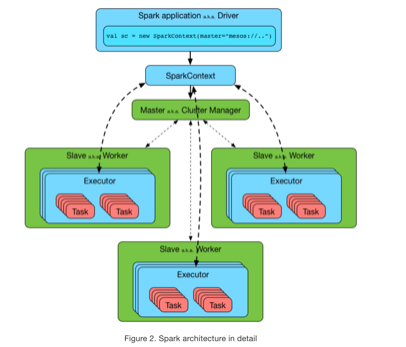

### Modos de despliegue

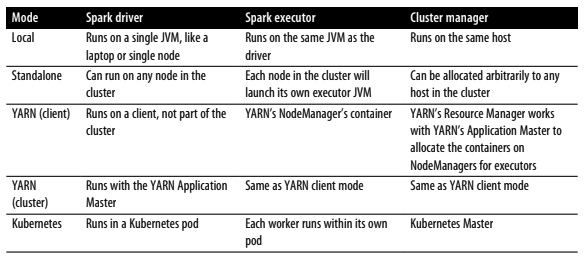

# PySpark

Como se acaba de exponer, SparkSession es el punto de entrada de un programa Spark. En versiones anteriores, si quisiéramos trabajar con Hive o SQL, habría que declarar varios contextos. Con Spark Session nos abstraemos de los diferentes contextos y utilizamos un único punto de entrada para leer datos, gestionar los recursos del cluster o trabajar con metadatos.

Para más info sobre `Spark Session` https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.SparkSession.html

Y https://spark.apache.org/docs/2.3.0/configuration.html

No todas las opciones siempre van a ser iguales. En este caso, he especificado que quiero que se use spark en local con tantos threads como me permita mi máquina ( `master("local[*]")`) y dependerá, también, de la plataforma donde estés ejecutando spark.

Por ejemplo, en GCP puedo tener esta configuración:

`spark = SparkSession.builder \
    ``.appName('PySpark MyApp')`
    `.config('spark.jars', 'gs://spark-lib/
    `bigquery`spark-bigquery-latest_2.12.jar')`
    `.config('spark.driver.maxResultSize', '150g')\
    .getOrCreate()`
``spark.conf.set("spark.sql.repl.eagerEval.enabled", True)``


# Abstracciones sobre los datos Datos

En Spark hay tres formas de trabajar con los datos: RDD, DataFrames y DataSets. En Pyspark >>v 2.0 sobretodo se termina trabajando en DataFrames porque `py` no tiene una interfaz nativa de Datasets y es mucho más fácil e intuititvo que trabajar con RDD. En esta guía didáctica solamente trabajaremos con `DataFrames` aunque conviene introducir, brevemente, el concepto de RDD



# PySpark: RDD


**Colección** de registros o filas (recordad, en **memoria**), que representan una entidad (por ejemplo, un vuelo, un curso, un alumno) sobre las que se puede aplicar operaciones - métodos - de *transformación* en otro RDD, o invocar *acciones* para recuperar resultados.



1. Particionado: se distribuyen los datos por todos los nodos del cluster. Nº x defecto -> numero de cores disponibles
2. Inmutables: una vez se crean, no pueden cambiar
3. Resilentes: si un nodo cae, los datos se pueden reconstruir

Otras características: RDD no tiene soporte para la ejecución optimizada, esto es, no optimiza la secuencia de acciones a realizar para obtener el resultado, y permite tipado fuerte.

El procesamiento ocurre de forma distribuida en los nodos, pero en el caso de Spark los datos se almacenan en la memoria de cada nodo del cluster


Existen dos tipos de operaciones#+
+ Transformaciones: transforman el RDD en otro RDD
+ Acciones: obtienen el resultado (collect)

Lo más importante en este punto es tener claro que las transformaciones se pueden aplicar en cadena, pero no se ejecutan hasta que se hace la llamada a la acción. De este modo se genera un Grafo Acíclico Dirigido (DAG) de transformaciones.

## Nota:

En este colab no se van a tratar los RDD en código. No obstante, veremos que se puede obtener el RDD a partir de un DataFrame. Veréis que existe un concepto que se denomina `Row`. Podéis usar `map`, `filter` y `flatmap` sobre `RDD` .


# Dataframes
Se asimilan a una tabla de BBDD.
Se generan sobre los RDD y por tanto comparten sus características, pero te facilitan una mayor abstracción al realizar las operaciones y facilita la optimización de las acciones.


## Nota: Datasets

En Py no no se suelen usar los datasets. Podéis pensar en ellos como una interfaz evolucionada de los dataframes, mezclando lo mejor de los dos mundos: tipado fuerte y optimización.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F, types as T
spark = SparkSession.builder.appName("Varios").master("local[*]").getOrCreate()
spark

# Importación

En versiones anteriores de Spark, la forma de crear un RDD a partir de textos era con las funciones `parallelize((tupla1),(tupla2),...,(tuplaN))` o leyendo los archivos de textos `textFile(ruta, particiones)` Ahora se puede utilizar la interfaz `read.` para leer los archivos y transformando los datos a un dataframe

Spark permite la lectura de diferentes formatos: `json, parquet, avro, csv o accediendo mediante jdbc a datos de la bbdd`. En entornos cloud, existen interfaces para conectar con sus repositorios (por ejemplo, en Google, con BigQuery).

En este ejemplo, vamos a obligar a que nos detecte el schema!

In [ ]:
archivo = './sample_data/california_housing_train.csv'
df_spark = spark.read.csv(archivo, inferSchema=True, header=True)

# imprimir tipo de archivo
print(type(df_spark))

# RDD tradicional: spark.textFile(ruta,...)


# DAG

Acabo de deciros que Spark genera un DAG con las transformaciones que va panificando hasta que se hace una acción. Este grafo puede ser descompuesto en tareas que se ejecutan en paralelo en los diferentes workers en el clúster.

Vamos a ver cómo sería con la lectura de datos y con una operación de agregación (no os preocupéis que lo veremos luego!)

In [ ]:

spark.read.csv(archivo, inferSchema=True, header=True).explain()


In [ ]:
df_spark.groupby('housing_median_age').agg(F.sum('population')).explain()

In [ ]:
rddspark = df_spark.rdd
type(rddspark)

# Particiones


In [ ]:
df_spark2 = df_spark.repartition(3)

In [ ]:
print(df_spark2.rdd.getNumPartitions())


In [ ]:
rddspark.getNumPartitions()


In [ ]:
rddspark2 = rddspark.repartition(3)


In [ ]:
rddspark2.getNumPartitions()

En el disco duro, se pude almacenar los datos mediante el método `partitionBy`. Cada partición serán subcarpetas en el disco duro:

In [ ]:
df_spark.write.mode("overwrite").partitionBy("housing_median_age").csv("./output")

In [ ]:
## Analizamos el dataframe

df_spark.limit(10).toPandas().describe()


# Dataframe

Dataframe nos permite trabajar con RDD a más alto nivel, como si de una tabla de BBDD se tratase.

No impone un tipado fuerte, pero sí un esquema (implícito o explícito) sobre los datos.

## Descriptivos

¿Numero de registros en el dataframe?

In [ ]:
df_spark.count()




## Estructura del dataframe

In [ ]:
df_spark.printSchema()

¿Nombre de las Columnas de dataframe?

In [ ]:
df_spark.columns

Ver los primeros 20 registros del dataframe

In [ ]:
df_spark.collect()[0]

In [ ]:
df_spark.show()

In [ ]:
arrayData = [ ['el caso'],['es'],[' asi es nuestra casa']
]

df = spark.createDataFrame(data=arrayData)
df.printSchema()
df.show()
df2 = df.select(
        F.explode(
            F.split(df._1, " ")
        ).alias("word"))
df2.show()

## Descricipcion estadistica del dataframe

Anteriormente, ya hemos realizado un describe sobre el `pandas dataframe` obtenido a partir del `spark dataframe`. Este método  no es igual al describe sobre un `pandas`. Por ejemplo:

In [ ]:
df_spark.describe()

In [ ]:
df_spark.limit(10).toPandas().describe()

`describe` se asemeja más a un `printSchema

In [ ]:
df_spark.printSchema()

Si queremos un comportamiento similar a la de `pandas`, tenemos que llamar al método `show` o identificar la columna en concreto. Por ejemplo, descripcion estadistica de una sola columna ('median_house_value').

**Pregunta**: qué está haciendo

In [ ]:
df_spark.describe().show()

In [ ]:
df_spark.describe(['median_house_value']).show()

## Persist y caché

Spark permite el almacenamiento en memoria o en disco de los datos que está gestionando. Mientras que persist te permite almacenarlos con un mayor nivel de control (memoria, disco, serializados o no), cache permite su almacenmiento en memoria.

Este almacenamiento puede ser útil cuando se van a realizar múltiples transformaciones u operaciones de un dataframe.

Sin embargo, la elección entre caché y persist va a depender del tamaño del dataframe y del tiempo que puede tardar en serializar o deserializar los datos.


In [ ]:
df_spark.cache()

In [ ]:
df_spark.persist(StorageLevel.MEMORY_AND_DISK)

# Operaciones básicas




## Devolver los datos del dataframe

Para devolver todos los datos de un pyspark dataframe, se usa la función `collect`:

Fijaos que devuelve una lista de filas. No es la mejor forma de trabajar con los datos. Para gestionar esta situación, tenemos que usar funciones de **`selección`** y **`filtrado`** de columnas y registros:

In [ ]:
df_spark.collect()

## Filtrado de datos

## Selección -- columnas

In [ ]:
df_spark.select(['total_rooms','total_bedrooms']).show()

## Filtrado -- filas

In [ ]:
filtrado = df_spark.filter(df_spark.total_rooms>1000)

In [ ]:
filtrado

In [ ]:
filtrado.show()

## Filtrado -- where

In [ ]:
filtrado.where(filtrado.total_bedrooms==1283).show()

In [ ]:
filtrado_pd = filtrado.toPandas()

In [ ]:
filtrado_pd.loc[filtrado_pd.total_bedrooms==1283]

## Acceso a filas / columnas

No existe algo parecido a `.iloc` o `.loc``

Tenemos que jugar con `collect`, `show`, `select` y `filter`

Por ejemplo:

### Seleccionar habitaciones y población cuando las habitaciones sean mayor a ... 100!! Pero devuelve sólo los 10 primeros resultados



In [ ]:

df_spark.select('total_bedrooms','population').where(filtrado.total_bedrooms>100)

In [ ]:
df_spark.select('total_bedrooms','population').where(filtrado.total_bedrooms>100).collect()[:10]

In [ ]:
df_spark.select('total_bedrooms','population').where(filtrado.total_bedrooms>100).show(10)

### Si quisiéramos coger los datos de toda una columna

`select (F.collect_list(nombrecolumna)).first()[0]`



In [ ]:
df_spark.select(F.collect_list('total_bedrooms')).first()[0]

In [ ]:
df_spark.toPandas()[['total_bedrooms']]

## Sorting

En general, podemos ordenadar:

1. Llamando a la columna con método .asc() o .desc(), por ejemplo:

`df.sort(columna.asc())`

2. Llamando a la función de ordenación ascendente o descendente  sobre el nombre de la columna:

`df.sort (F.asc('columna'))`



In [ ]:
ordenado = filtrado.sort(filtrado.median_income.asc())

In [ ]:
ordenado.show()

## Order by

Lo vamos a complicar un poco: vamos a renombrar median_income y haremos el order by por esa columna renombrada

In [ ]:
filtrado.select('longitude','latitude',F.col('median_income').alias('cosito')).orderBy(F.col('cosito').asc()).show()

In [ ]:
filtrado.select('longitude','latitude',F.col('median_income').alias('cosito')).orderBy(F.asc('cosito')).show()

# Operaciones sobre columnas

Las operaciones sobre columnas se realizan con el método `withColumn (nombre, función))`

Para instanciar las columnas, dependiendo de la función, se puede hacer directamente con el nombre de la columna o, por ejemplo, habiendo importado el módulo `pyspark.sql.functions as F`, haciendo la llamada `F.col(nombre_columna)`

## Operaciones sobre una columna

In [ ]:
fp = filtrado.toPandas()
fp['housing_median_age'] = fp ['housing_median_age'] + 1

In [ ]:
filtrado.select('housing_median_age').show(3)

In [ ]:
 filtrado.withColumn('housing_median_age',F.col('housing_median_age')+1).show()

In [ ]:
filtrado.withColumn('housing_median_age',filtrado.housing_median_age-1).show()



## Operaciones con CASE - WHEN

Podemos hacer un `case when` como en `SQL`. Para ello usamos la función `F.when().otherwise()`

`F.Lit` permite establecer valores literales en una columna. Ojo, cuando se pase como parámetro un valor a una función `udf` que no sea columna, es necesario utilizarlo.



In [ ]:
filtrado.withColumn('catgoria_edad',F.when(
    (filtrado.median_income.isNotNull() & filtrado.housing_median_age.isNotNull()), 'GUAY'
).otherwise(F.lit('N/A'))).show()



In [ ]:
household_final = filtrado.withColumn('catgoria_cliente',F.when(
    (filtrado.median_income>3), 'TARGET'
).when((filtrado.median_income>1) & (filtrado.median_income<3),'CUASITARGET').otherwise(F.lit('IGNORE')))

household_final.show()



SELECT CASE WHEN MEDIAN_INCOME>3 THEN 'TARGET'
            WHEN (MEDIAN_INCOME > 1 AND MEDIAN_INCOME<3) THEN 'CUASI' ELSE 'IGNORE' END AS 'COLUMNA'
            

### Renombrado de columnas

En el apartado de `sorting`,  ya hemos visto un par de ejemplos.

Vamos a refrescarlo!

1. `withColumnRenamed`


In [ ]:
household_final = household_final.withColumnRenamed('catgoria_cliente','categoria_xelenial')
household_final.show()

2. Utilizando `alias` sobre una columna determinada, por ejemplo:

In [ ]:
df_spark.select(F.col('housing_median_age').alias('edad casa')).limit(1).show()

## Operaciones sobre una columna, utilizando más de una columna

In [ ]:
## Vamos a añadir una nueva columna que sea el porcentaje de households por población

household_final.withColumn('household_per_pop', F.col('households')/F.col('population')).show()

## Borrado de columnas

In [ ]:
household_final.drop('categoria_xelenial').show()

In [ ]:
for r in household_final.collect():
  print (r.total_rooms)
  break

# Otras operaciones interesantes

## Eliminar duplicados



In [ ]:
elimineitor = household_final.drop_duplicates(['longitude'])

In [ ]:
elimineitor.where(elimineitor.longitude == -114.31).show()

## Funciones sobre fechas

In [ ]:
household_final = household_final.withColumn('fecha_actual',F.current_date())
household_final.show()

In [ ]:
household_final = household_final.withColumn('fecha_cierre',F.add_months(F.col('fecha_actual'),3))
household_final.show()

In [ ]:
household_final.withColumn('diferencia',F.datediff(household_final.fecha_actual,household_final.fecha_cierre)).show()

# Operaciones avanzadas

## Join

In [ ]:
jugadores = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/pyspark_datasets/player.csv',inferSchema=True, header=True)
atributos = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/pyspark_datasets/player_attributes.csv',inferSchema=True, header=True)

In [ ]:
jugadores.show()

In [ ]:
atributos.show()

In [ ]:
jugadores_atributos = jugadores.select('player_api_id','height').join(atributos,on='player_api_id',how='left')

In [ ]:
jugadores_atributos.show()

## Agregaciones

Las agregaciones se realizan con la secuencia de operaciones siguientes:

`groupBy` + `agg (función[.alias()])`

`groubBy` + `función de agregación` -- `sum / mean / max / min ...` `[.withColumnRenamed]`

`groupBy` + `agg ({'campo':'funcion_de_agregacion})`
..

In [ ]:
household_final.groupby('categoria_xelenial').mean('median_house_value').withColumnRenamed('avg(median_house_value)','media_valor').show()

In [ ]:
household_final.groupby('categoria_xelenial').mean('median_house_value').show()

In [ ]:
household_final.groupby('categoria_xelenial').agg(F.mean("median_house_value").alias("media")).show()

In [ ]:
household_final.groupby('categoria_xelenial').agg({'median_house_value':'mean'}).alias("media").show()

In [ ]:
household_final.groupby('categoria_xelenial').agg(F.count_distinct('median_house_value').alias('conteo')).show()

In [ ]:
atributos.groupBy('preferred_foot').agg(F.count_distinct('player_api_id').alias('tipo')).show()

In [ ]:
atributos.groupBy('preferred_foot').agg(F.first('player_api_id').alias('elprimero')).show()

In [ ]:
atributos.groupBy('preferred_foot').mean('overall_rating').show()

In [ ]:
%%time
resultado.groupBy('preferred_foot').sum('overall_rating').withColumnRenamed('sum(overall_rating)','total').show()

# SQL

SPARL SQL es una librería que funciona sobre SPARK Core. Permite gestionar tus datos sobre SPARK como si se tratase de SQL, facilitando la interacción con el usuario.

Spark, por defecto, utiliza Apache Hive para guardar todos los metadatos sobre las tablas que se almacenan (hive metastore). Del mismo modo, spark permite crear tablas gestionadas o no gestionadas.

Para una tabla gestionada, Spark gestion datos y metadatos en el archivo, que puede ser un sistema de ficheros, HDFS o Storage en GCP. Para una tabla sin gestionar, Spark sólo guarda los metadatos mientras que tú gesitionas esa información.

De este modo, si se realiza una operación de creación o borrado en una tabla sin gestionar desde spark, sólo se borraran los metadatos, pero los datos se mantendrán.

Esta información se puede gestionar en la configuración de Spark.

Del mismo modo, Spark puede crear **vistas** para consultar la información con Spark SQL. Las vistas pueden ser globales o locales a la sesión y desaparecen cuando la sesión de Spark desaparece.

En los ejemplos subsiguientes nosotros sólo manejaremos vistas.

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Información de tráfico aéreo") \
    .getOrCreate()

In [ ]:
airlines = spark.read\
                .format("csv")\
                .option("header", "true")\
                .load("/content/drive/MyDrive/Colab Notebooks/pyspark_datasets/airlines.csv")

In [ ]:
airlines

Las vistas temporales están ligadas a esta sesión y app. Si quisiéramos una vista que estuviera ligada a todas las sesiones, deberíamos seleccionar GlobalTempView

In [ ]:

airlines.createOrReplaceTempView("airlines")

In [ ]:
airlines

In [ ]:
airlines = spark.sql("SELECT * FROM airlines")
airlines.columns

In [ ]:
type(airlines)

In [ ]:
airlines.show(1)

In [ ]:
airlines.show()

In [ ]:
vuelos = spark.read\
                .format("csv")\
                .option("header", "true")\
                .load('/content/drive/MyDrive/Colab Notebooks/pyspark_datasets/flights.csv')

In [ ]:
## Generación de una vista temporal en la sesión sobre una bbdd por defecto

vuelos.createOrReplaceTempView("vuelos")
vuelos = spark.sql("SELECT * FROM vuelos")

In [ ]:
vuelos.show()

In [ ]:
vuelos.count()

In [ ]:
spark.sql("select count(*) as registros from vuelos").show()

In [ ]:
spark.sql("select sum(distance) as distancia_total from vuelos").show()

In [ ]:


total_distance_df = spark.sql("SELECT distance FROM vuelos")\
                         .agg({"distance":"sum"})\
                         .withColumnRenamed("sum(distance)","distancia_total")

In [ ]:
total_distance_df.show()

In [ ]:
spark.sql ("select destination, avg(arrival_delay) as retraso from vuelos group by destination order by 2 desc ").show()

In [ ]:
spark.sql("SELECT AIRLINES.DESCRIPTION, VUELOS.* FROM VUELOS LEFT JOIN AIRLINES ON Airlines.code = vuelos.airlines").show(1)

# Funciones

Son funciones que el usuario va a definir para realizar sobre el dataframe. Spark va a dividir los jobs entre los diferentes nodos y recuperará los resultados.

Las UDF facilitan la abstracción y la reutilización de lógica de negocio, pero se ejecutan a nivel de fila. En general, los beneficios derivados del coste de refactorizar el código es inferior al tiempo de ejecución cuando el tamaño del dataset es muy grande.


Para solventar este problema y vectorizar las operaciones, se usan `pandas_udf`. Además, si se utiliza el backend de arrow (formato de tabla columnar), el rendimiento se ve incrementado.

Vamos a ver cuatro ejemplos:
1. Una udf normal
2. Pandas udf
3. Grouped Map
4. Grouped Agg



## Ejemplo 1

In [ ]:
from pyspark.sql.functions import udf,pandas_udf,PandasUDFType
from pyspark.sql.types import *

@udf
def incrementar_col (col):
  return col + 1

%time
df_spark = df_spark.withColumn('incremento',incrementar_col(F.col('total_rooms')))

df_spark.withColumn('incremento', F.col('total_rooms') + 1)

## Ejemplo 2

In [ ]:
from typing import Iterator, Tuple

@pandas_udf(returnType = DoubleType())
def calcular_ingresos_brutos(
        iterator: Iterator[Tuple[pd.Series, pd.Series]]) -> Iterator[pd.Series]: # por defecto, iterador de entrada
    return (households * median_income for households, median_income in iterator)

%time
df_spark.withColumn("ingresos_brutos", calcular_ingresos_brutos(df_spark['households'],df_spark['median_income'])).show()


## Ejemplo 3

In [ ]:
schema = StructType([
    StructField("Casa", StringType(), True),
    StructField("median_income", DoubleType(), True),
    StructField('porc_ventas',DoubleType(),True)])

@pandas_udf(schema, PandasUDFType.GROUPED_MAP) #returnType, UDFType
def calcular_porcentaje(ingreso):
    ingresos_totales = ingreso['median_income'].sum()
    ingreso['porc_ventas'] = (ingreso['median_income'] / ingresos_totales) * 100
    return ingreso[['Casa','median_income', 'porc_ventas']]

# Aplicar la UDF agrupando por categoría
resultado = df_spark.select(['Casa','median_income']).groupby("Casa").apply(calcular_porcentaje)

resultado.show()

## Ejemplo 4

In [ ]:
@pandas_udf(FloatType(), PandasUDFType.GROUPED_AGG)
def agregar(ingreso):
    ingresos_totales = ingreso.sum()
    porcentaje =  (ingreso.mean() / ingresos_totales) * 100
    return porcentaje.mean()
# Aplicar la UDF agrupando por categoría
resultado = df_spark.select(['Casa', 'median_income']).groupBy("Casa").agg(agregar(F.col('median_income')).alias('median_income'))
